# Amazon Sales Data : Price EDA
---
## 데이터 로드 및 검토

In [109]:
import pandas as pd
import requests

amazon_df = pd.read_csv('../../data/amazon.csv')

In [110]:
amazon_df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


---
## 데이터 전처리
### 1. Price 단위 변환
- 루피(₹) -> 원(₩)

In [111]:
# discount_price와 actual_price 컬럼에서 '₹'와 ','를 제거하고 실수형으로 변환
price_cols = ['discounted_price', 'actual_price']
amazon_df[price_cols] = amazon_df[price_cols].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [112]:
# discount_percentage 컬럼에서 '%'를 제거하고 실수형으로 변환
amazon_df['discount_percentage'] = amazon_df['discount_percentage'].replace('%', '', regex=True).astype(float)

In [113]:
def fetch_exchange_rates(base_currency):
    """
    API를 호출하여 환율 정보를 가져와 exchange_rates에 저장
    :param base_currency: 기준 통화 코드 (예: 'USD')
    """
    global exchange_rates
    response = requests.get(f'https://api.exchangerate-api.com/v4/latest/{base_currency}')
    
    if response.status_code == 200:
        exchange_rates = response.json()['rates']
    else:
        return 'API 호출 실패, Status code :', response.status_code


def exchange_rate(amount, from_currency, to_currency):
    """
    주어진 금액을 from_currency에서 to_currency로 변환
    :param amount: 변환할 금액
    :param from_currency: 변환할 통화의 코드 (예: 'USD')
    :param to_currency: 결과 통화의 코드 (예: 'EUR')
    :return: 변환된 금액
    """
    if not exchange_rates:
        fetch_exchange_rates(to_currency)
    try:
        if from_currency not in exchange_rates or to_currency not in exchange_rates:
            raise ValueError("잘못된 통화 코드입니다.")
        converted_amount = (amount / exchange_rates[from_currency]) * exchange_rates[to_currency]
        return round(converted_amount, 2)
    except Exception as e:
        print(f"오류 발생: {e}")
        return None

In [114]:
# 함수 테스트
fetch_exchange_rates('USD')  
exchange_rate(10, 'USD', 'KRW')

13568.2

In [115]:
# API 호출
fetch_exchange_rates('KRW')

# dataframe에 적용할 함수
def convert_currency(row, col):
    return exchange_rate(row[col], 'INR', 'KRW')

# DataFrame에 환율 변환 결과 추가
amazon_df['discounted_price_KRW'] = amazon_df.apply(lambda row: convert_currency(row, 'discounted_price'), axis=1).astype(int)
amazon_df['actual_price_KRW'] = amazon_df.apply(lambda row: convert_currency(row, 'actual_price'), axis=1).astype(int)

In [116]:
amazon_df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,6435,17725
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,3209,5629


#### + 데이터에 있는 discounted_percentage는 정확한걸까?

In [117]:
check_df = amazon_df.copy()

def calculate_discount_percentage(row):
    original_price = row['actual_price_KRW']
    discounted_price = row['discounted_price_KRW']
    
    if original_price <= 0:
        return 0
        
    discount_percentage = ((original_price - discounted_price) / original_price) * 100
    return round(discount_percentage)

check_df['calculate_ds_percentage'] = check_df.apply(calculate_discount_percentage, axis=1)

# amazon_df[['discount_percentage', 'calculate_ds_percentage']]
check_df.query('discount_percentage != calculate_ds_percentage')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW,calculate_ds_percentage
817,B08WD18LJZ,TVARA LCD Writing Tablet 8.5 Inch E-Note Pad L...,Computers&Accessories|Accessories&Peripherals|...,249.0,600.0,59.0,4.0,"1,208","Perfect for kids, students and businessman. Gr...","AFNCX33YXD6T4LAWBFYXN6RR7LZQ,AGOJ5KXS5VV6NQS3X...","Uthiranathan,Scuba_3d,Amazon Customer,archana,...","R3SIBLYM5T5AFY,R1YQKXTIBLGEMJ,R2XT2VFFBQ2UR1,R...","Product is good,Lots of fun for the price,Good...",Product is good. But the brightness is not tha...,https://m.media-amazon.com/images/I/518mUXLlFZ...,https://www.amazon.in/TVARA-Writing-Tablet-Inc...,4016,9677,58
1456,B0B9JZW1SQ,"4 in 1 Handheld Electric Vegetable Cutter Set,...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,498.0,1200.0,59.0,3.2,113,{ 4 in 1 multi-function Electric Vegetable Cut...,"AFCTMQKPVJI6Y2JPIGDKRKIAV43A,AF6XUHN32GSFA7LFG...","Ashish,Kavita J.,Sundar,Tessy S.,saurabh manro...","R3N2A5DV7IPG6R,RXX6FP17PFNBS,R1JENN8Y0UV8G,RXP...","Cutter speed and power is very low,Nt happy wi...",",It's nt wrkng evn aftr 4 hours of charging,Th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Handheld-Electric-Vegeta...,8032,19354,58


---
### 2. null값, 이상값 전처리
- null값 제거
- rating행의 이상값 '|'는 중간값인 3.0으로 대체

In [118]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1465 non-null   object 
 1   product_name          1465 non-null   object 
 2   category              1465 non-null   object 
 3   discounted_price      1465 non-null   float64
 4   actual_price          1465 non-null   float64
 5   discount_percentage   1465 non-null   float64
 6   rating                1465 non-null   object 
 7   rating_count          1463 non-null   object 
 8   about_product         1465 non-null   object 
 9   user_id               1465 non-null   object 
 10  user_name             1465 non-null   object 
 11  review_id             1465 non-null   object 
 12  review_title          1465 non-null   object 
 13  review_content        1465 non-null   object 
 14  img_link              1465 non-null   object 
 15  product_link         

In [119]:
# discounted_price_KRW 컬럼에서 null 값인 행 필터링
amazon_df[amazon_df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...,3209,16112
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75.0,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...,4016,16112


In [120]:
# null값 제외
amazon_df = amazon_df[amazon_df['rating_count'].notnull()]
amazon_df = amazon_df.reset_index().drop(columns=('index'))

- 리뷰를 남긴 사용자가 한 명뿐인 것으로 보임. 결측치가 포함된 행은 제거

In [121]:
# 숫자가 아닌 값을 포함한 행 필터링
non_numeric_ratings = amazon_df[~amazon_df['rating'].str.replace('.', '', regex=False).str.isnumeric()]
non_numeric_ratings

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
1277,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,33854,40306


In [122]:
amazon_df.loc[amazon_df['rating'].str.contains('|', regex=False), 'rating'] = 3.0

- 별점을 매긴 사용자 수는 많지만 별점 값이 숫자가 아님. 중간값인 3.0으로 대체

In [123]:
amazon_df['rating'] = amazon_df['rating'].astype(float)
amazon_df['rating_count'] = amazon_df['rating_count'].str.replace(',','').astype(int)

---
### 3. 중복값 제거

In [124]:
# 최유리님 코드 참고
print("데이터프레임 전체 기준 중복 데이터 여부: ", amazon_df.duplicated().any()) 
print("Product_id 기준 중복 데이터 여부: ", amazon_df['product_id'].duplicated().any())

데이터프레임 전체 기준 중복 데이터 여부:  False
Product_id 기준 중복 데이터 여부:  True


- DataFrame 기준으로는 중복 데이터가 없지만 product_id 기준으로는 중복 데이터가 존재한다.

In [125]:
amazon_df.sort_values('product_id').head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
46,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,8177,19483
879,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,8177,19483


In [126]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../..')))

import prep_functions

prep_functions.compare_two_rows(amazon_df, 46, 879)


Comparing row 46 and row 879:
  img_link:
    Row 46: https://m.media-amazon.com/images/I/31+NwZ8gb1L._SX300_SY300_.jpg
    Row 879: https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31+NwZ8gb1L._SX300_SY300_.jpg
  product_link:
    Row 46: https://www.amazon.in/D-Link-DWA-131-Wireless-Adapter-Black/dp/B002PD61Y4/ref=sr_1_50?qid=1672909126&s=electronics&sr=1-50
    Row 879: https://www.amazon.in/D-Link-DWA-131-Wireless-Adapter-Black/dp/B002PD61Y4/ref=sr_1_327?qid=1672903011&s=computers&sr=1-327


- 해당 notebook에서 진행하는 price_EDA에 img_link, product_link는 큰 의미가 없다고 판단하여 product_id, product_name, discounted_price_KRW, actual_price_KRW 해당 컬럼의 값이 중복되는 행은 가장 마지막 행을 두고 삭제하기로 결정

In [127]:
# 중복 행 제거 (product_id, product_name, discounted_price_KRW, actual_price_KRW 기준)
amazon_df = amazon_df.drop_duplicates(subset=['product_id', 'product_name', 'discounted_price_KRW', 'actual_price_KRW'], keep='last')

In [128]:
amazon_df.sort_values('product_id').head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
879,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,8177,19483
143,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749.0,1339.0,44.0,4.2,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,12080,21596
719,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399.0,499.0,20.0,4.3,27201,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,6435,8048
722,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279.0,375.0,26.0,4.3,31534,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,4500,6048
732,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",Computers&Accessories|Accessories&Peripherals|...,699.0,995.0,30.0,4.5,54405,You can surf the Web with more comfort and eas...,"AGIOL4B6EPMZ63RZQFWZWI33O2EA,AG33OJYQIXPPS7CON...","Chandrashekar SK,Mohammed Ashfaque,Arif Hussai...","R28ZB0YUM6FKKB,RNB44LXBJIPTL,RVSWATRY0CJIV,R3I...","Good silent mouse,Too small to hold!,Reviewing...",It's little small for big hands. But best avai...,https://m.media-amazon.com/images/I/31CtVvtFt+...,https://www.amazon.in/Logitech-M235-Wireless-M...,11274,16048


In [129]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 2 to 1462
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1353 non-null   object 
 1   product_name          1353 non-null   object 
 2   category              1353 non-null   object 
 3   discounted_price      1353 non-null   float64
 4   actual_price          1353 non-null   float64
 5   discount_percentage   1353 non-null   float64
 6   rating                1353 non-null   float64
 7   rating_count          1353 non-null   int64  
 8   about_product         1353 non-null   object 
 9   user_id               1353 non-null   object 
 10  user_name             1353 non-null   object 
 11  review_id             1353 non-null   object 
 12  review_title          1353 non-null   object 
 13  review_content        1353 non-null   object 
 14  img_link              1353 non-null   object 
 15  product_link          1353

- 전처리 후 기존 1465개의 행에서 1353개의 행으로 데이터 줄어듬

---
### 카테고리별 할인 가격과 할인율 분포
- Big category 추출

In [130]:
amazon_df.loc[:, 'big_category'] = amazon_df['category'].apply(lambda x: x.split('|')[0])

In [131]:
amazon_df.loc[:, 'small_category'] = amazon_df['category'].apply(lambda x: x.split('|')[-2])

In [132]:
cols = ['big_category', 'discount_percentage', 'discounted_price_KRW', 'actual_price_KRW']
category_price = amazon_df[cols]

In [133]:
category_price['big_category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [134]:
category_price.head(2)

,big_category,discount_percentage,discounted_price_KRW,actual_price_KRW
2,Computers&Accessories,90.0,3209,30629
8,Computers&Accessories,50.0,8048,16112


#### big category별 할인 가격과 할인율 분포

In [135]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [136]:
# 카테고리 별 데이터 개수 체크
big_category_count = category_price.groupby('big_category').size().reset_index(name='count')
big_category_count.sort_values('count', ascending=False, inplace=True)
big_category_count

,big_category,count
2,Electronics,493
4,Home&Kitchen,448
1,Computers&Accessories,374
7,OfficeProducts,31
5,HomeImprovement,2
6,MusicalInstruments,2
0,Car&Motorbike,1
3,Health&PersonalCare,1
8,Toys&Games,1


In [137]:
def discount_percentage_scatterplot(data, x='discounted_price_KRW', y='discount_percentage', hue='big_category'):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x, y=y, hue=hue, data=data, palette='Set1')

    plt.xlabel('Discounted Price (KRW)')
    plt.ylabel('Discount Percentage')

    # 단위 축소 비활성화
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='x')

    plt.legend(title='Big Category')
    plt.show()

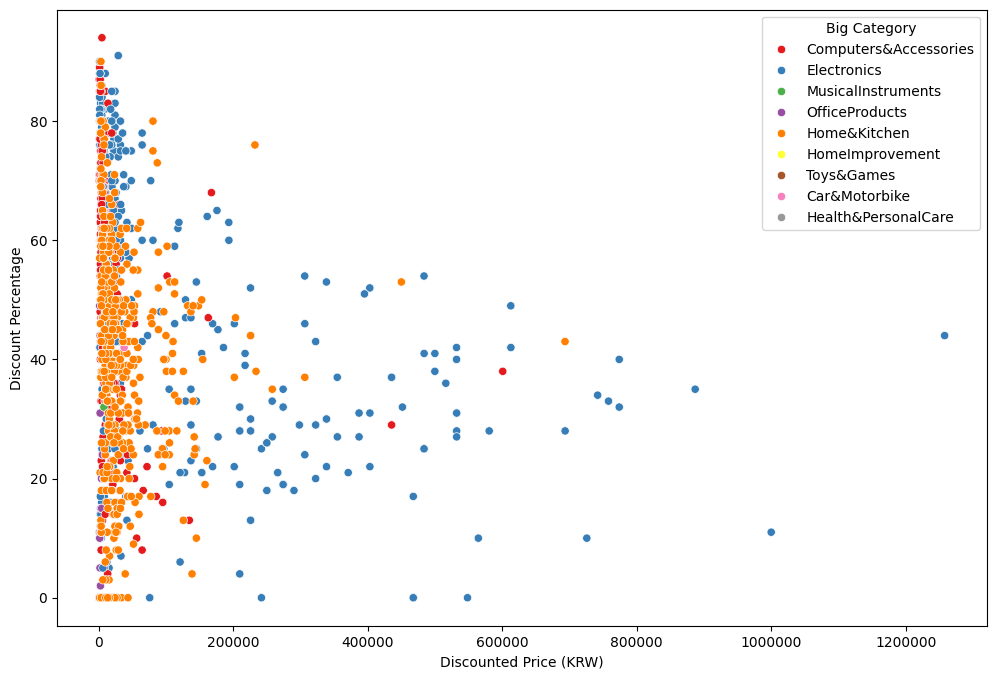

In [138]:
discount_percentage_scatterplot(category_price)

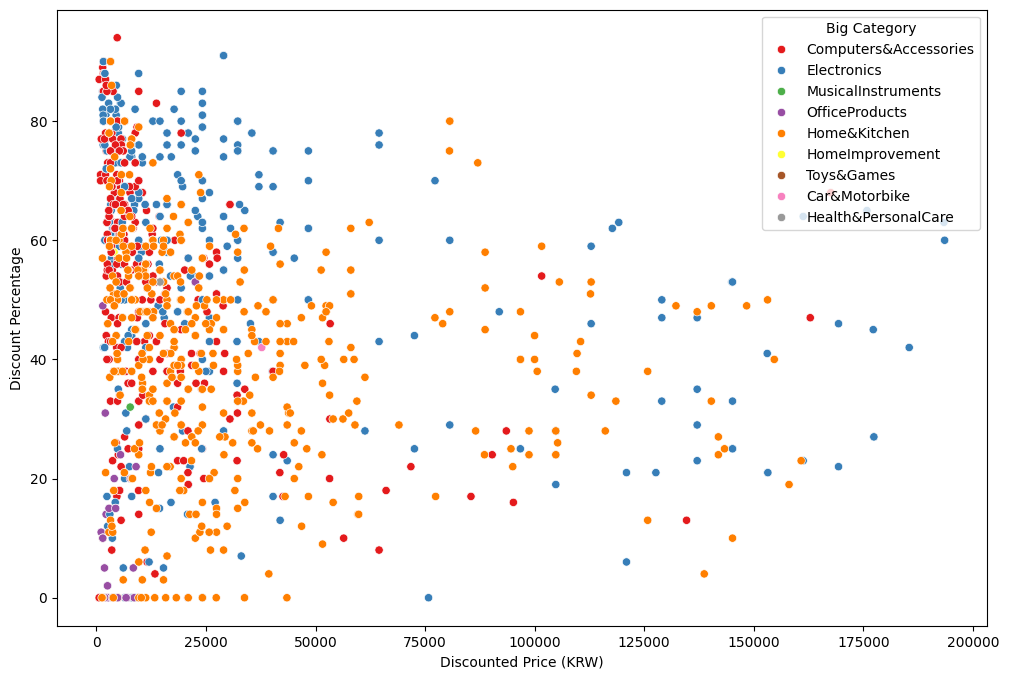

In [139]:
# 위 그래프에서 가장 많아 보이는 0 ~ 200000 범위만 확대해보기
filtered_df = category_price[(category_price['discounted_price_KRW'] >= 0) & (category_price['discounted_price_KRW'] <= 200000)]
discount_percentage_scatterplot(filtered_df)

- Computers&Accessories 카테고리는 낮은 가격대에 분포되어있다.
- Electonics 카테고리는 할인된 가격이 다른 카테고리에 비해 높고 할인율이 고루 분포되어 있지만 할인된 가격이 낮은 상품은 할인율이 60~90%에 밀집된 부분이 있다.
- Home&Kitchen 카테고리는 할인율이 고루 분포되어 있지만 40~80%에 밀집된 부분이 있다.
- OfficeProducts 카테고리는 데이터량이 적다. 대부분 낮은 가격대와 낮은 할인율을 가지고 있다.

---
### 수치형 데이터의 상관관계

In [140]:
# 수치형 데이터 Dataframe 생성
cols = ['actual_price_KRW','discounted_price_KRW','discount_percentage','rating','rating_count']
df = amazon_df[cols]

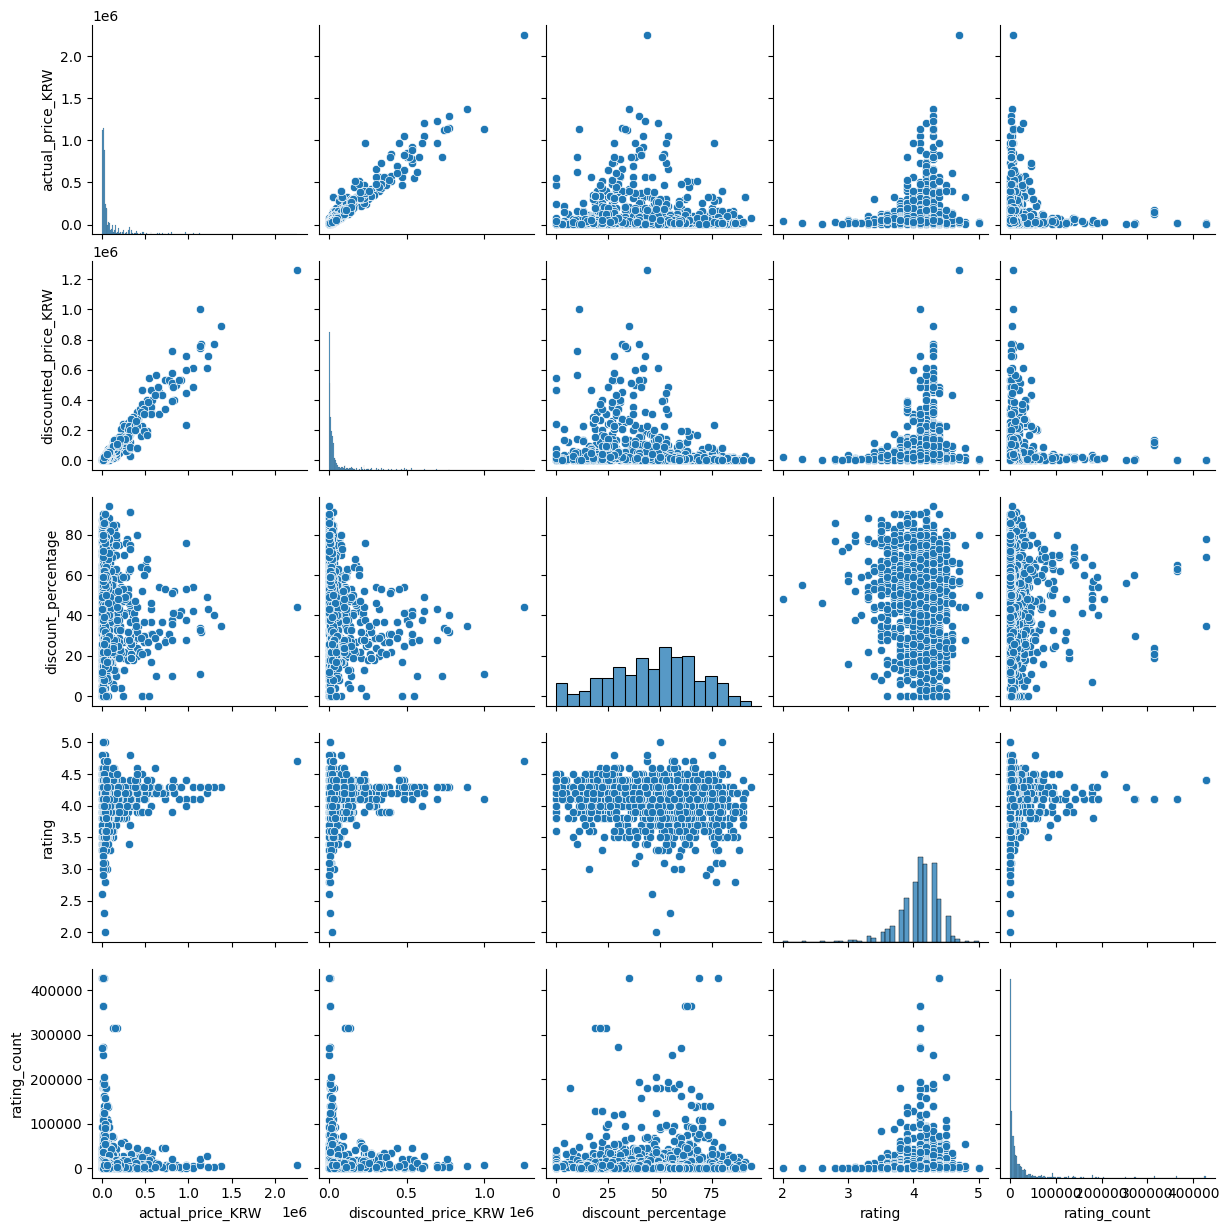

In [141]:
sns.pairplot(df)
plt.show()

- rating_count와 다른 변수간 뚜렷한 관계가 보이지 않으며 제품의 가격 또는 할인 가격, 할인율과 평점을 매긴 구매자 수는 큰 관계가 없어보인다.

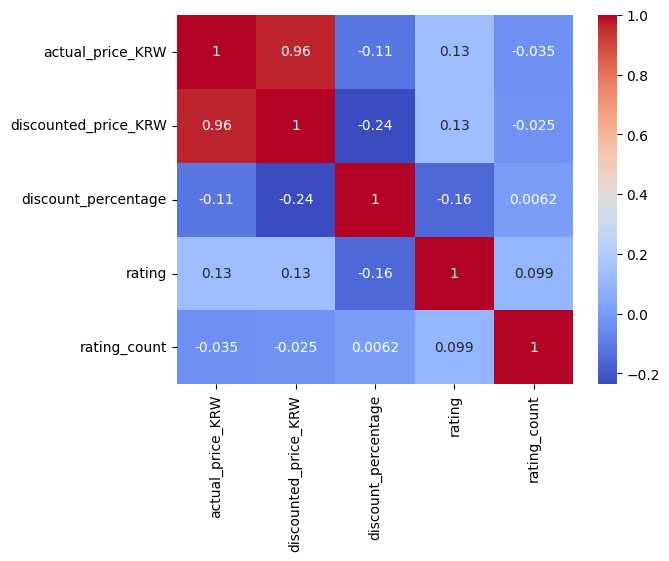

In [142]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- 평점과 할인율 간 약한 음의 상관관계(-0.16)가 보인다. 할인율이 높을수록 평점이 낮아지는 경향이 보인다.
- 평점과 제품 가격 간 약한 양의 상관관계(0.13)가 보인다. 할인율과 달리 실제품 가격이 높을수록 평점이 높아지는 경향이 보인다.

---
#### 할인율이 높으면 평점이 낮다?

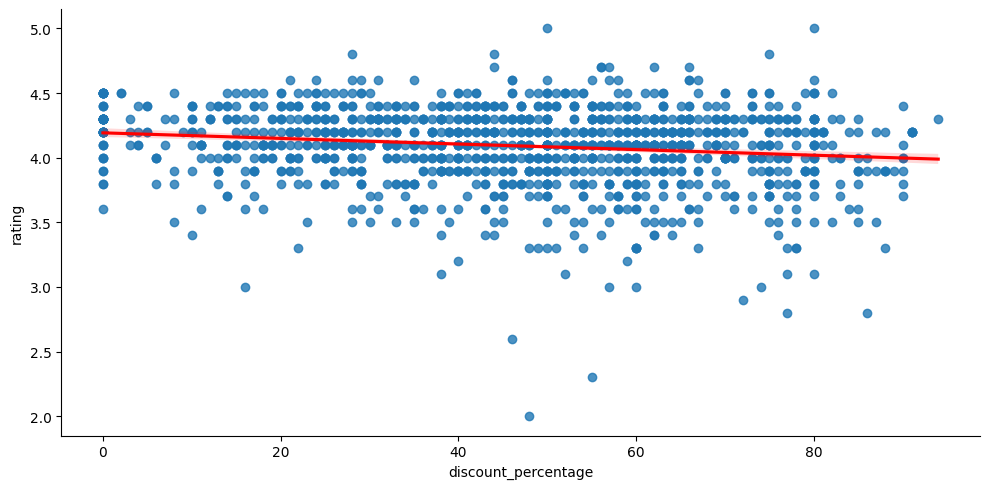

In [143]:
# 할인율과 평점 산점도와 회귀선
sns.lmplot(x='discount_percentage', y='rating', data=df, 
           height=5, aspect=2, 
           line_kws={'color': 'red'})
plt.show()


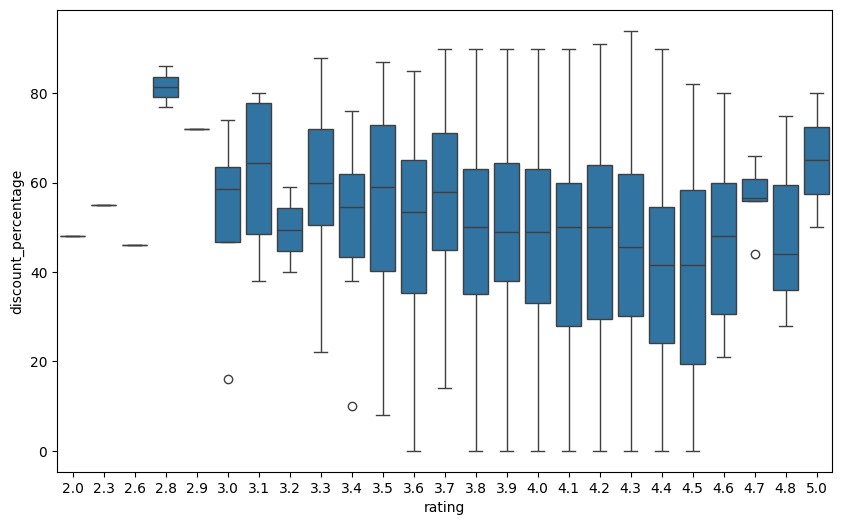

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='discount_percentage', data=df)
plt.show()

- 평점이 낮은 구간이 비교적 할인율이 큰 것으로 보인다.
- 특정 평점 구간(3.8~4.2)은 평균적으로 약 50%의 할인율이 적용된 것으로 보인다.

---
### 어떤 제품을 판매해야 좋을까

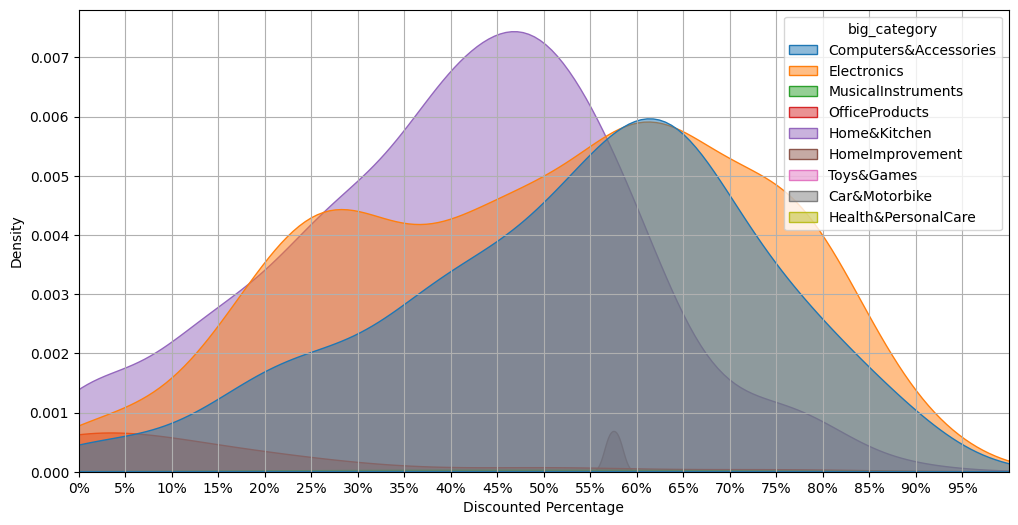

In [145]:
# 카테고리별 할인율의 확률 밀도
plt.figure(figsize=(12, 6))
sns.kdeplot(data=category_price, x='discount_percentage', hue='big_category', fill=True, alpha=0.5, warn_singular=False)
plt.xlabel('Discounted Percentage')
plt.xlim(0, 100)
ticks = range(0, 100, 5)
plt.xticks(ticks, [f'{tick}%' for tick in ticks])
plt.grid()
plt.show()

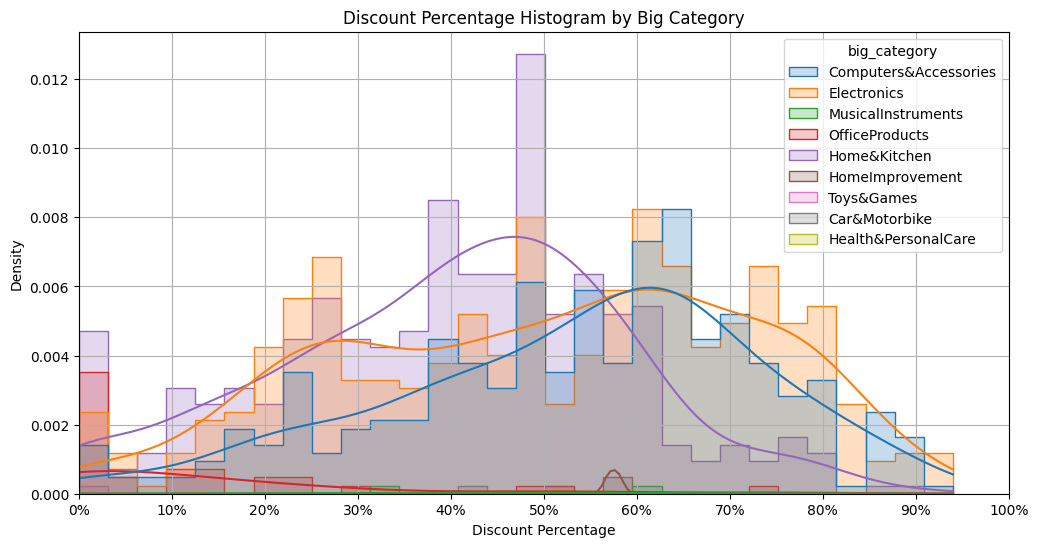

In [146]:
plt.figure(figsize=(12, 6))
sns.histplot(data=category_price, x='discount_percentage', hue='big_category', bins=30, kde=True, stat='density', element='step')
plt.title('Discount Percentage Histogram by Big Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Density')

plt.xlim(0, 100)
ticks = range(0, 101, 10)
plt.xticks(ticks, [f'{tick}%' for tick in ticks])

plt.grid()
plt.show()

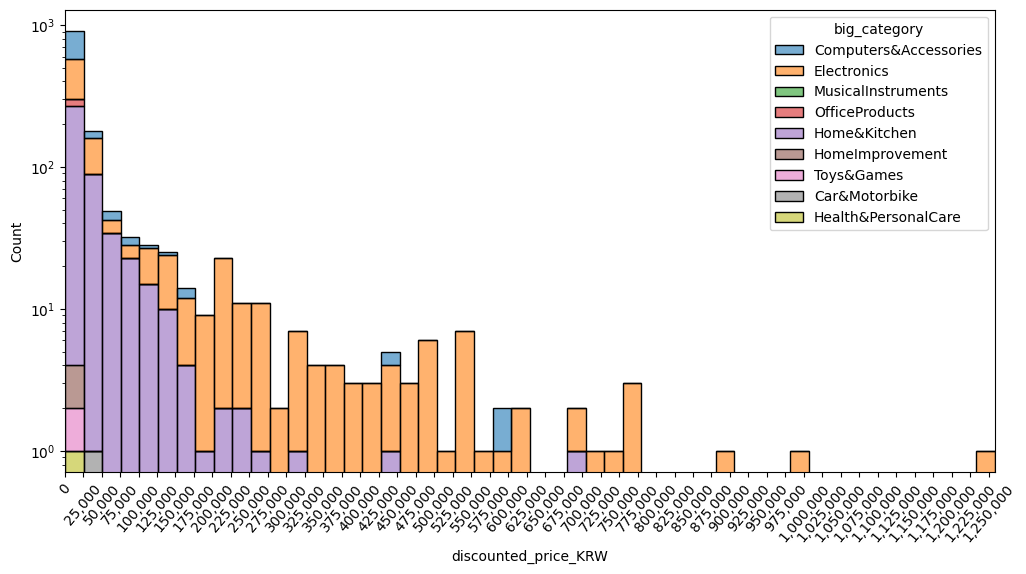

In [147]:
# 카테고리별 할인된 제품 가격의 분포
plt.figure(figsize=(12, 6))
sns.histplot(data=amazon_df, x='discounted_price_KRW', hue='big_category', multiple='stack', bins=50, alpha=0.6)
plt.xlim(0, amazon_df['discounted_price_KRW'].max())
ticks = range(0, amazon_df['discounted_price_KRW'].max(), 25000)
plt.xticks(ticks, [f'{tick:,}' for tick in ticks], rotation=50)
plt.yscale('log')
# plt.grid()
plt.show()

- Computers&Accessories 카테고리는 60~65%의 할인율의 빈도가 많으며 25000원 이내의 할인 가격이 약 1000개로 카테고리의 대부분 제품이 25,000원 이내에 판매 되고있다.
- Electronics 카테고리는 25~30%, 60~65%의 할인율의 빈도가 많으며 다양한 가격대에 제품이 판매 되고있다.
- OfficeProducts 카테고리는 가장 낮은 0~10%의 할인율의 빈도를 가지고 있으며 25000원 이내에 제품이 판매되고있다.
- Home&Kitchen 카테고리는 40~50%의 할인율의 빈도를 가지며 125,000원 이내에 카테고리의 제품이 판매 되고있다.
- 위 할인율의 빈도와 할인 가격의 분포로 보았을 때 Electronics 카테고리의 제품을 판매하는 것이 수익을 올릴 수 있을 것이라 예상된다.

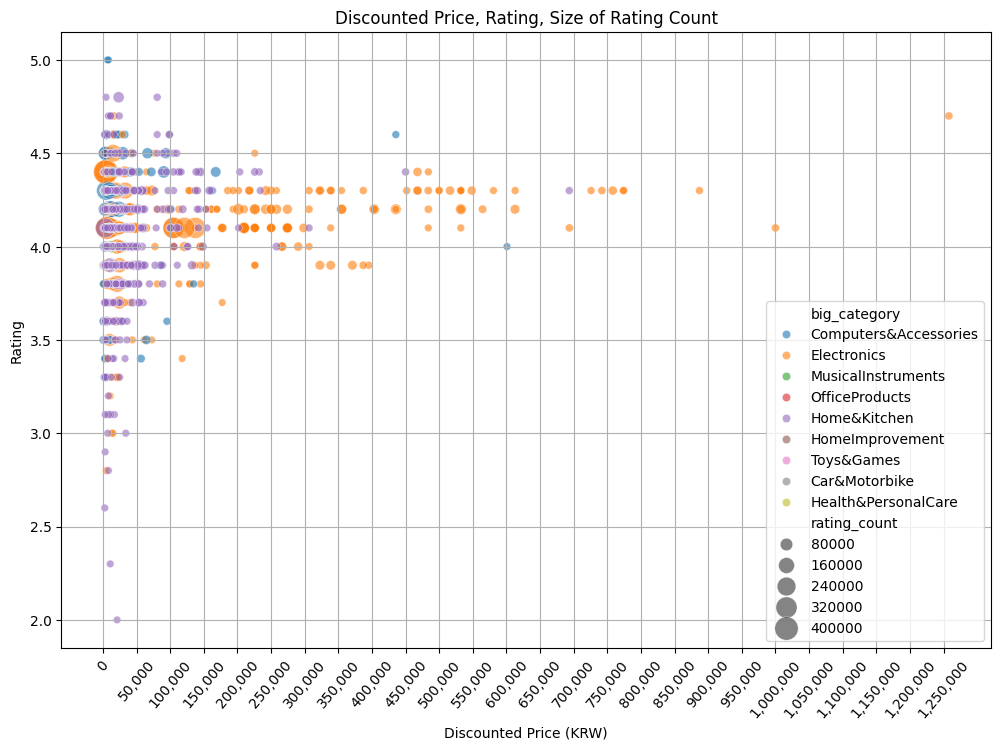

In [148]:
# 평점, 제품 할인가격과 평점을 남긴 사람 수의 산점도
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=amazon_df, 
    x='discounted_price_KRW', 
    y='rating', 
    hue='big_category', 
    size='rating_count', 
    sizes=(30, 300),
    alpha=0.6
)
plt.xlabel('Discounted Price (KRW)')
plt.ylabel('Rating')
plt.title('Discounted Price, Rating, Size of Rating Count')
ticks = range(0, amazon_df['discounted_price_KRW'].max(), 50000)
plt.xticks(ticks, [f'{tick:,}' for tick in ticks], rotation=50)
plt.grid(True)
plt.show()

---
### 군집화
- product_name(제품 이름), about_product(제품 설명)

In [149]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 불용어 다운로드
nltk.download('stopwords')

amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 2 to 1462
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1353 non-null   object 
 1   product_name          1353 non-null   object 
 2   category              1353 non-null   object 
 3   discounted_price      1353 non-null   float64
 4   actual_price          1353 non-null   float64
 5   discount_percentage   1353 non-null   float64
 6   rating                1353 non-null   float64
 7   rating_count          1353 non-null   int64  
 8   about_product         1353 non-null   object 
 9   user_id               1353 non-null   object 
 10  user_name             1353 non-null   object 
 11  review_id             1353 non-null   object 
 12  review_title          1353 non-null   object 
 13  review_content        1353 non-null   object 
 14  img_link              1353 non-null   object 
 15  product_link          1353

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isehui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:
cluster1_df = amazon_df.copy()

# 데이터가 가장 많은 카테고리 4개 / Electronics, Home&Kitchen, Computers&Accessories, OfficeProducts
# filter_category = big_category_count[:4]
# cluster1_df = cluster1_df[cluster1_df['big_category'].isin(filter_category['big_category'])]

# Electronics 카테고리 제외
# cluster1_df = cluster1_df[~cluster1_df['big_category'].isin(['Electronics'])]

# 카테고리 별 데이터 개수 체크
category_count = amazon_df.groupby('small_category').size().reset_index(name='count')
category_count.sort_values('count', ascending=False, inplace=True)
category_count = category_count[:10]
cluster1_df = cluster1_df[cluster1_df['small_category'].isin(category_count['small_category'])]

# 불용어 list
stop_text = set(stopwords.words('english'))

# 전처리 및 단어 리스트 만들기
def preprocess_and_split(text):
    text = text.lower() 
    text = re.sub(r'[\W\d]+', ' ', text).split()
    product_description = set(text) - stop_text
    return list(product_description)

# 제품 이름과 설명 list 생성
cluster1_df['name_words'] = cluster1_df['product_name'].apply(preprocess_and_split)
cluster1_df['description_words'] = cluster1_df['about_product'].apply(preprocess_and_split)

# 결과 확인
print(cluster1_df[['product_name', 'name_words', 'about_product', 'description_words']])

                                           product_name  \
2     Sounce Fast Phone Charging Cable & Data Sync U...   
16    MI 80 cm (32 inches) 5A Series HD Ready Smart ...   
24    Acer 80 cm (32 inches) I Series HD Ready Andro...   
26    OnePlus 80 cm (32 inches) Y Series HD Ready LE...   
38    OnePlus 126 cm (50 inches) Y Series 4K Ultra H...   
...                                                 ...   
1454  4 in 1 Handheld Electric Vegetable Cutter Set,...   
1456  Libra Room Heater for Home, Room Heaters Home ...   
1459  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1460  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1462  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                             name_words  \
2     [cable, ios, mini, compatible, charging, sounc...   
16    [android, l, mi, black, ready, hd, series, sma...   
24    [android, ar, black, ready, hd, series, smart,...   
26    [android, oneplus, black, ready, hd, series, s...

In [172]:
category_count

,small_category,count
10,Cables,191
82,SmallKitchenAppliances,137
83,Smartphones&BasicMobiles,77
89,Televisions,66
97,WearableTechnology,64
38,Headphones,60
0,Accessories,52
50,"Keyboards,Mice&InputDevices",50
76,RoomHeaters,44
95,WaterHeaters&Geysers,44


In [190]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# K-Means 클러스터링을 위한 함수 정의
def cluster_KMeans(data, column_name, n_clusters=4):
    # NaN 값을 제외한 후 CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data[column_name].dropna())

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # PCA를 통해 차원 축소
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(word_count_df)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    
    # NaN 값 제외한 인덱스에 맞춰 big_category를 추가
    pca_df['small_category'] = data['small_category'].dropna().values

    # K-Means 클러스터링
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    pca_df['cluster'] = kmeans.fit_predict(pca_result)

    # 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=pca_df, x='PCA1', y='PCA2', hue='cluster', 
        palette='viridis', alpha=0.7, style='small_category', 
        markers=["o", "s", "D", "P"]
    )
    plt.grid()
    plt.show()

In [194]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# K-Means 클러스터링을 위한 함수 정의
def cluster_TSNE(data, column_name, n_clusters=4):
    # NaN 값을 제외한 후 CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data[column_name].dropna())

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(word_count_df)

    tsne_df = pd.DataFrame(data=word_count_df, columns=['PCA1', 'PCA2'])
    
    # NaN 값 제외한 인덱스에 맞춰 big_category를 추가
    tsne_df['small_category'] = data['small_category'].dropna().values

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    tsne_df['cluster'] = hierarchical.fit_predict(tsne_df)

    # 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=tsne_df, x='PCA1', y='PCA2', hue='cluster', 
        palette='viridis', alpha=0.7, style='small_category', 
        markers=["o", "s", "D", "P"]
    )
    plt.grid()
    plt.show()

In [170]:
cluster1_df['combined_text'] = cluster1_df['name_words'].apply(lambda x: ' '.join(x)) + ' ' + cluster1_df['description_words'].apply(lambda x: ' '.join(x))
cluster1_df['name_words'] = cluster1_df['name_words'].apply(lambda x: ' '.join(x))
cluster1_df['description_words'] = cluster1_df['description_words'].apply(lambda x: ' '.join(x))

In [195]:
# cluster_and_plot(cluster1_df, 'name_words', n_clusters=4)
# cluster_and_plot(cluster1_df, 'description_words', n_clusters=4)
cluster_TSNE(cluster1_df, 'combined_text', n_clusters=3)

ValueError: could not convert string to float: 'Cables'

---
- user_id(리뷰 작성 아이디)

In [ ]:
amazon_df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW,big_category,small_category
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,3209,30629,Computers&Accessories,Cables
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,8048,16112,Computers&Accessories,NetworkAdapters


/Users/isehui/Desktop/ML_project/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


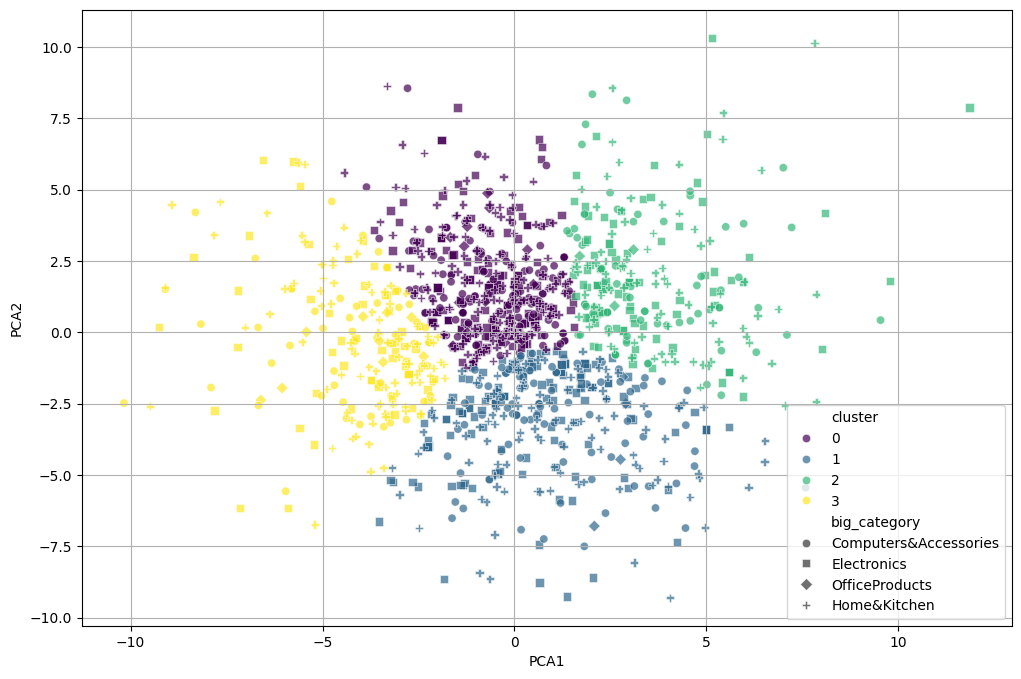

In [ ]:
cluster2_df = amazon_df.copy()

# 데이터가 가장 많은 카테고리 4개 / Electronics, Home&Kitchen, Computers&Accessories, OfficeProducts
filter_category = big_category_count[:4]
cluster2_df = cluster2_df[cluster2_df['big_category'].isin(filter_category['big_category'])]

cluster2_df['user_id']= cluster2_df['user_id'].str.split(',')
cluster2_df = cluster2_df.explode('user_id')

cluster_and_plot(cluster1_df, 'user_id', n_clusters=4)


---

- price 관련 columns

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# numeric_columns = ['discount_percentage', 'rating', 'rating_count', 'discounted_price_KRW', 'actual_price_KRW']
# numeric_columns = ['discount_percentage', 'discounted_price_KRW', 'actual_price_KRW']
# numeric_columns = ['discounted_price_KRW', 'actual_price_KRW']
numeric_columns = ['discount_percentage']

df_numeric = amazon_df[numeric_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# inertia = []
# K = range(1, 10)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_scaled)
#     inertia.append(kmeans.inertia_)

# plt.figure(figsize=(8, 4))
# plt.plot(K, inertia, 'bx-')
# plt.show()

/Users/isehui/Desktop/ML_project/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/7y/sc8hkqqj2b78cbbjbty9xcx40000gn/T/ipykernel_2398/190222680.py:6: UserWarning: 
The markers list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=amazon_df, x='discounted_price_KRW', y='actual_price_KRW', hue='cluster', palette='viridis', alpha=0.7, style='big_category', markers=["o", "s", "D", "P"])


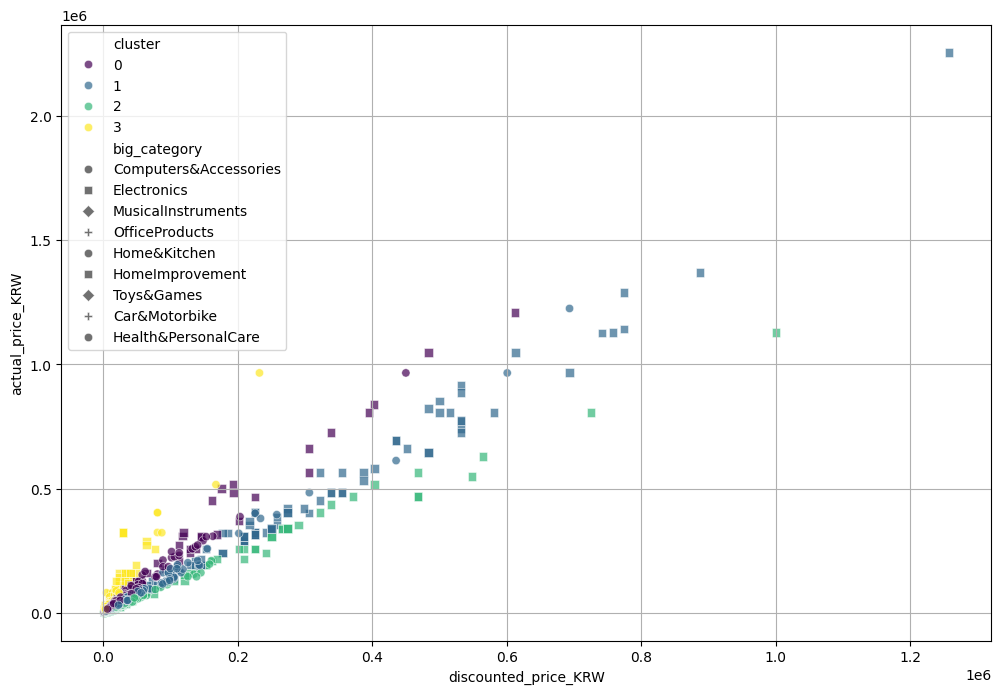

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
amazon_df['cluster'] = kmeans.fit_predict(df_scaled)

# 결과 확인
plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='discounted_price_KRW', y='actual_price_KRW', hue='cluster', palette='viridis', alpha=0.7, style='big_category', markers=["o", "s", "D", "P"])
plt.grid()
plt.show()

---

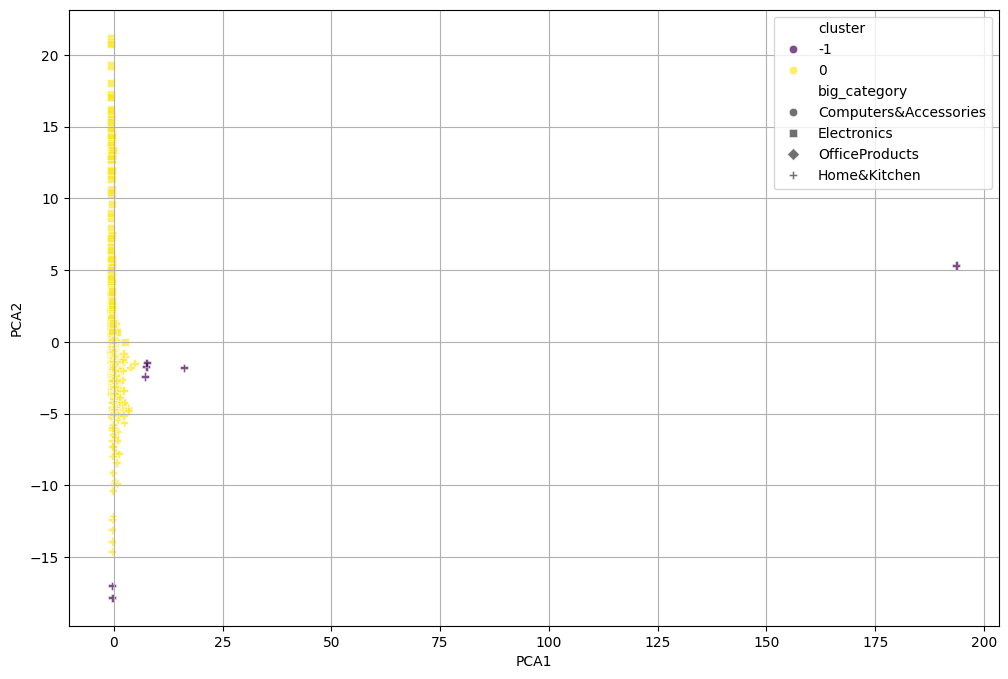

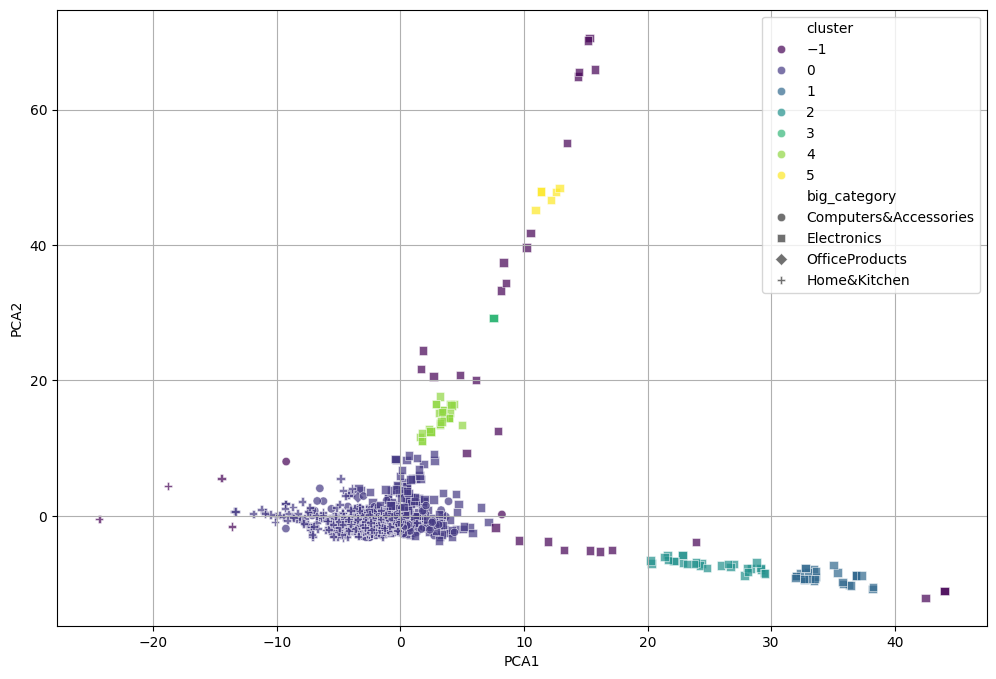

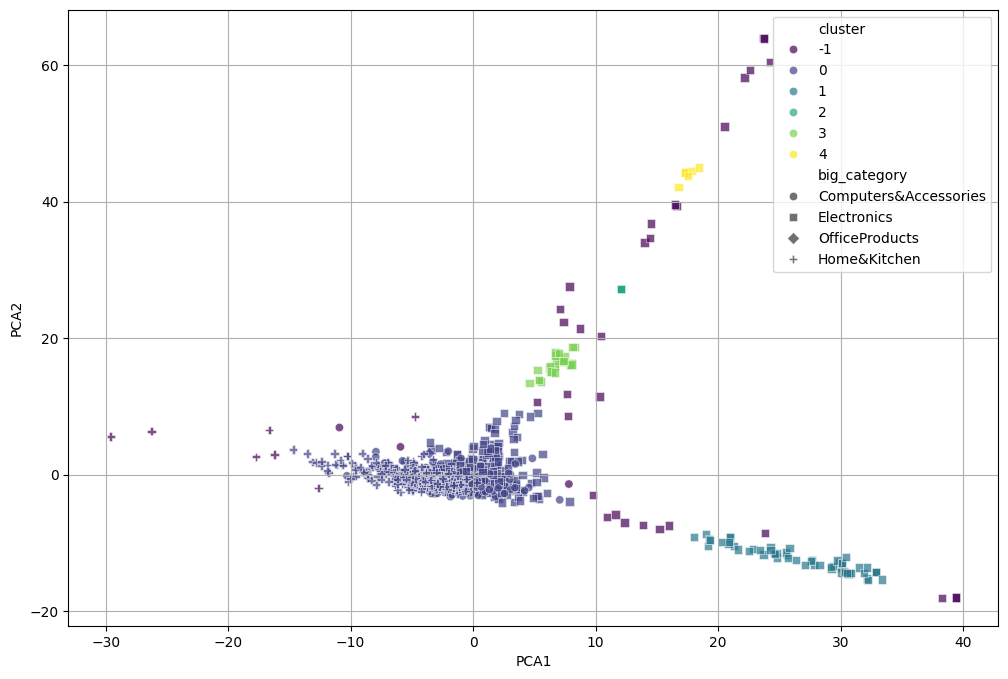

In [ ]:
from sklearn.cluster import DBSCAN

def cluster_and_plot_dbscan(data, column_name, eps=2, min_samples=5):
    # NaN 값을 제외한 후 CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data[column_name].dropna())

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # PCA를 통해 차원 축소
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(word_count_df)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # PCA 결과를 DataFrame에 추가
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    
    # NaN 값 제외한 인덱스에 맞춰 big_category를 추가
    pca_df['big_category'] = data['big_category'].dropna().values

    # DBSCAN 클러스터링
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    pca_df['cluster'] = dbscan.fit_predict(pca_result)

    # 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=pca_df, x='PCA1', y='PCA2', hue='cluster', 
        palette='viridis', alpha=0.7, style='big_category', 
        markers=["o", "s", "D", "P"]
    )
    plt.grid()
    plt.show()

cluster_and_plot_dbscan(cluster1_df, 'name_words')
cluster_and_plot_dbscan(cluster1_df, 'description_words')
cluster_and_plot_dbscan(cluster1_df, 'combined_text')

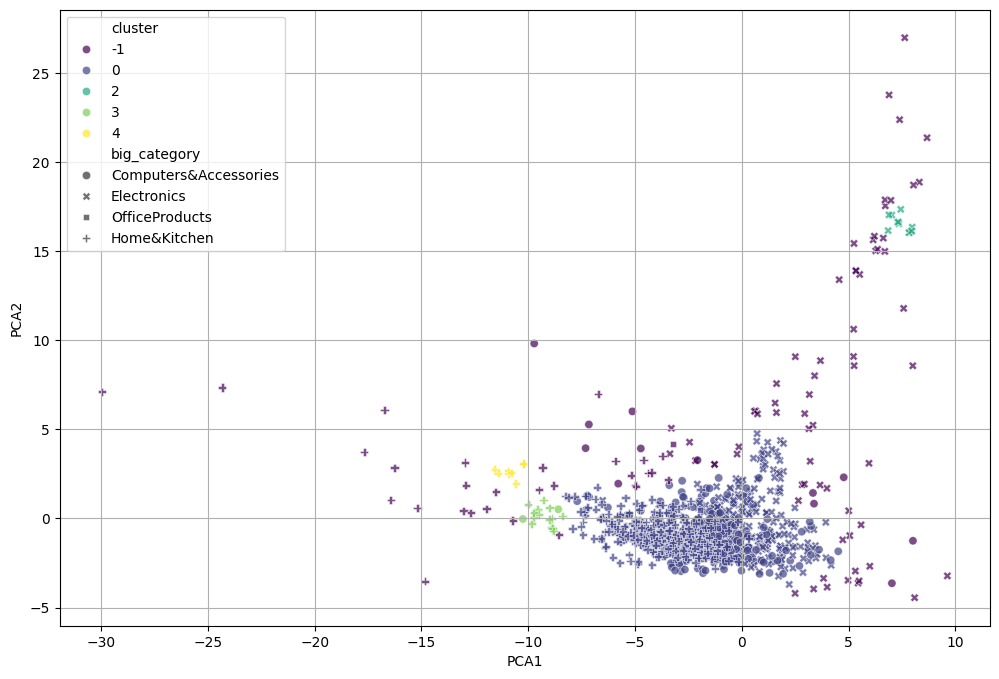

In [ ]:
def cluster_and_plot_filtered(data, column_name, n_clusters=4, pca1_threshold=10, pca2_threshold=30):
    # CountVectorizer로 단어 빈도 벡터화
    vectorizer = CountVectorizer()
    word_count_matrix = vectorizer.fit_transform(data[column_name])

    # Word Count Matrix를 DataFrame으로 변환
    word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # PCA를 통해 차원 축소
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(word_count_df)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # PCA 결과를 DataFrame으로 변환
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

    # big_category 열 추가
    pca_df['big_category'] = data['big_category'].values

    # K-Means 군집화 또는 DBSCAN 군집화
    dbscan = DBSCAN(eps=0.8, min_samples=8)
    pca_df['cluster'] = dbscan.fit_predict(pca_result)

    # PCA1 <= 10, PCA2 <= 30 조건 필터링
    filtered_data = pca_df[(pca_df['PCA1'] <= pca1_threshold) & (pca_df['PCA2'] <= pca2_threshold)]

    # 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=filtered_data, x='PCA1', y='PCA2', hue='cluster', palette='viridis', alpha=0.7, style='big_category')
    plt.grid()
    plt.show()

# 함수 실행 예시
cluster_and_plot_filtered(cluster1_df, 'combined_text', n_clusters=4)
